# Credit Card Customer Segmentation

We are given a dataset that contains information about a credit card company's customers and we are asked to help segment them into different groups in order to apply different business strategy for each type of customer.

For instance, the company could provide higher credit limits for customers that use the card a lot, but spend little money, or even create incentives for those with high income who don't use the card as much as the company expects. In order to apply different strategies, the company needs different groups of customers.

It is decided that we will use K-means algorithm to segment the customers.

In order to use the algorithm properly and achieve all the goals that the company has set for us, we'll go through the following steps:

* Analyze the dataset;
* Prepare the data for modeling;
* Find an appropriate number of clusters;
* Segment the data;
* Interpret and explain the results.

# Loading in the dataset

In [1]:
import pandas as pd
customers = pd.read_csv(r'C:\Users\nbnav\OneDrive\Desktop\Dataquest\customer_segmentation.csv')
print(customers.head())
print(customers.shape)

   customer_id  age gender  dependent_count education_level marital_status  \
0    768805383   45      M                3     High School        Married   
1    818770008   49      F                5        Graduate         Single   
2    713982108   51      M                3        Graduate        Married   
3    769911858   40      F                4     High School        Unknown   
4    709106358   40      M                3      Uneducated        Married   

   estimated_income  months_on_book  total_relationship_count  \
0             69000              39                         5   
1             24000              44                         6   
2             93000              36                         4   
3             37000              34                         3   
4             65000              21                         5   

   months_inactive_12_mon  credit_limit  total_trans_amount  \
0                       1       12691.0                1144   
1             

Our dataset contains information about 10127 customers with 14 features.

The data source gives us the following information about the features-

* customer_id: unique identifier for each customer.
* age: customer age in years.
* gender: customer gender (M or F).
* dependent_count: number of dependents of each customer.
* education_level: level of education ("High School", "Graduate", etc.).
* marital_status: marital status ("Single", "Married", etc.).
* estimated_income: the estimated income for the customer projected by the data science team.
* months_on_book: time as a customer in months.
* total_relationship_count: number of times the customer contacted the company.
* months_inactive_12_mon: number of months the customer did not use the credit card in the last 12 months.
* credit_limit: customer's credit limit.
* total_trans_amount: the overall amount of money spent on the card by the customer.
* total_trans_count: the overall number of times the customer used the card.
* avg_utilization_ratio: (Total Credit Card Balance) / (Total Credit Card Limit) over a period of time.

# Exploratory Data Analysis

Based on the above information, we can identify that there are 3 categorical columns and 11 numerical columns.

Let's find out if there are any null values in our dataset.

In [2]:
customers.isna().sum()

customer_id                 0
age                         0
gender                      0
dependent_count             0
education_level             0
marital_status              0
estimated_income            0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
credit_limit                0
total_trans_amount          0
total_trans_count           0
avg_utilization_ratio       0
dtype: int64

There are no null values in our dataset.

Let's take a few statiscal measures of our numerical columns and see if we spot out any anomalies.

In [3]:
customers.describe()

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,62078.206774,35.928409,3.812580,2.341167,8631.953698,4404.086304,64.858695,0.274894
std,3.690378e+07,8.016814,1.298908,39372.861291,7.986416,1.554408,1.010622,9088.776650,3397.129254,23.472570,0.275691
min,7.080821e+08,26.000000,0.000000,20000.000000,13.000000,1.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,32000.000000,31.000000,3.000000,2.000000,2555.000000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,50000.000000,36.000000,4.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,80000.000000,40.000000,5.000000,3.000000,11067.500000,4741.000000,81.000000,0.503000
max,8.283431e+08,73.000000,5.000000,200000.000000,56.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,0.999000


Some observations - 

* The mean age of our customers is 46 years old.
* The mean estimated income of 62000 is significantly higher than the median income of 50000. It means that there are some outliers on the right side of the distribution.
* The mean months on book of 35 months means most of our customers have been with us for quite some time.
* The mean credit limit of 8600  is significantly higher than the median credit limit of 4500. It means a few customers have exceptionally high credit limit than most customers.
* Mean utilization ratio is higher than the median utilization ratio which means there are some customers that are more dependent on their credit cards than others.

We could not find any major anomaly with our data and hence, we could continue in our process of segmenting our customers.

Let's plot the correlations of different features in our dataset. 

<AxesSubplot:>

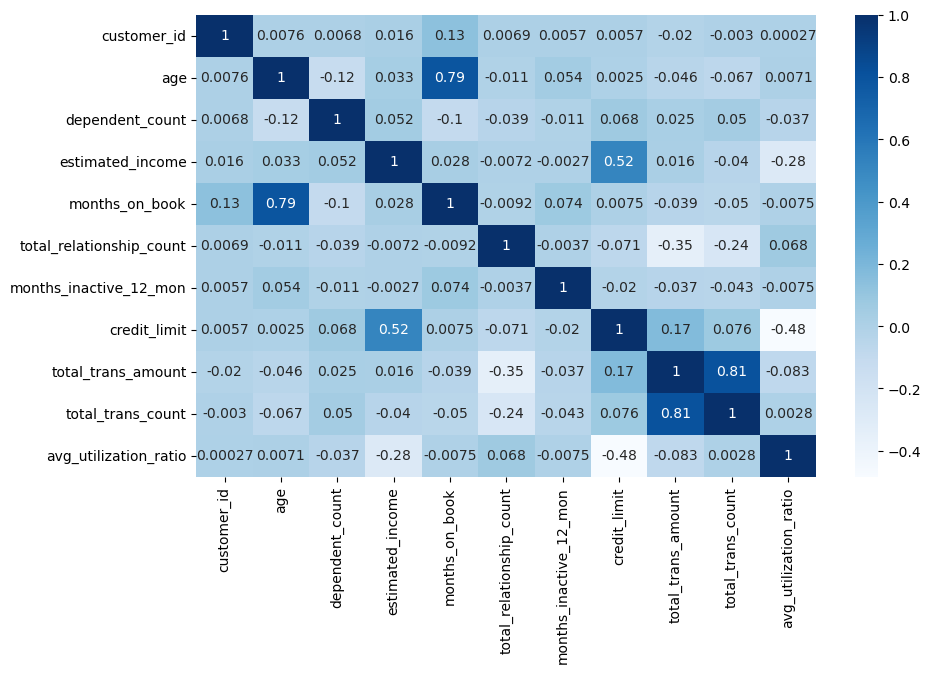

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
correlations = customers.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlations, annot=True, cmap='Blues')

Some observations-

* Age has a strong correlation with months on book. The older a person, the more time he has been with the company.

* Credit limit and estimated income goes hand in hand. More the estimated income, more credit limit the customer has.

* Credit limit has negative correlation with average utilization ratio. As credit limit starts to increase, the utilization ratio starts to decrease.

* Total transaction amount and total transaction count goes hand in hand.

Let's plot the distribution of each feature of our dataset and see if we can find anything interesting(except the customer id column).

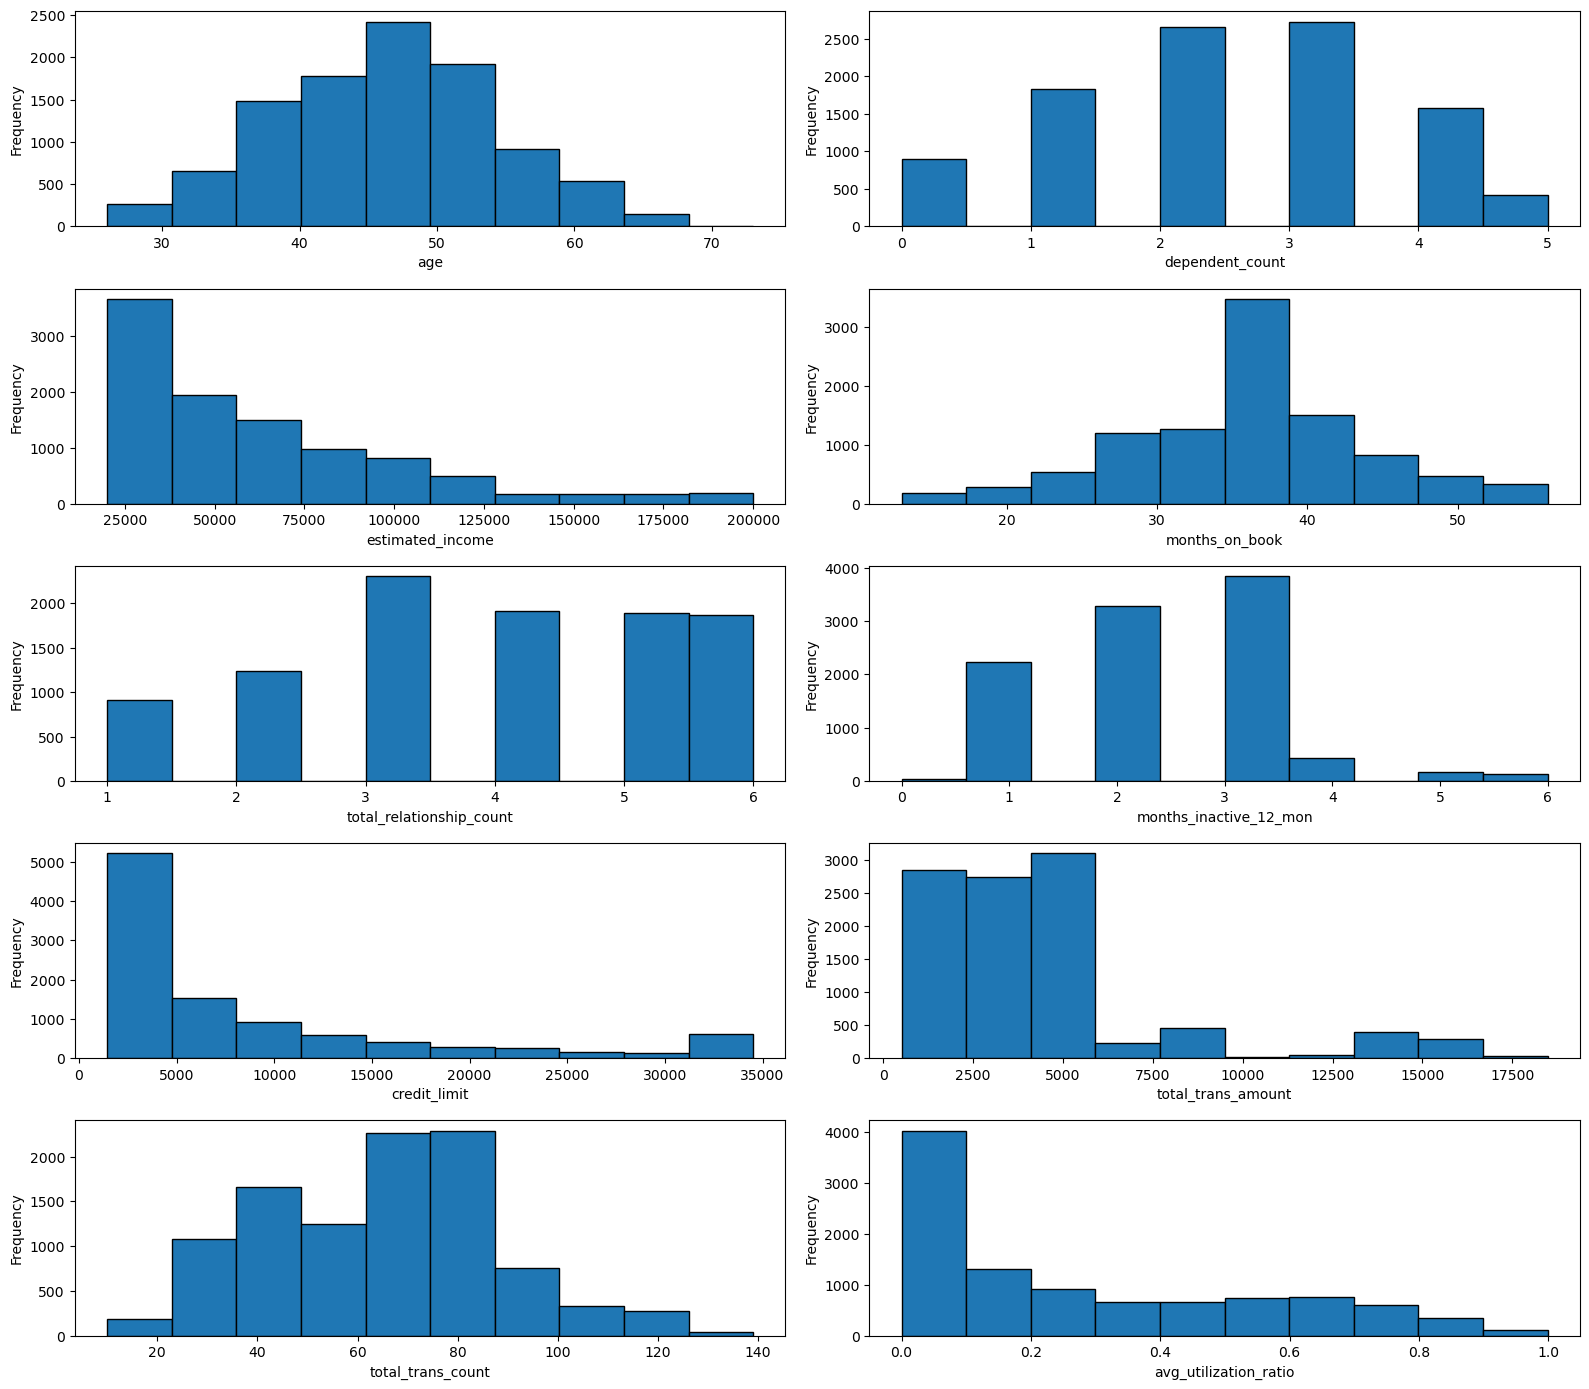

In [5]:
numeric_columns = ['age', 'dependent_count', 'estimated_income', 'months_on_book', 'total_relationship_count',
                   'months_inactive_12_mon', 'credit_limit', 'total_trans_amount', 'total_trans_count', 'avg_utilization_ratio']

fig, ax = plt.subplots(5, 2, figsize=(16, 14))
for i, column in enumerate(numeric_columns):
    row_index = i // 2
    col_index = i % 2

    ax[row_index, col_index].hist(customers[column], edgecolor='black')
    ax[row_index, col_index].set_xlabel(column)
    ax[row_index, col_index].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

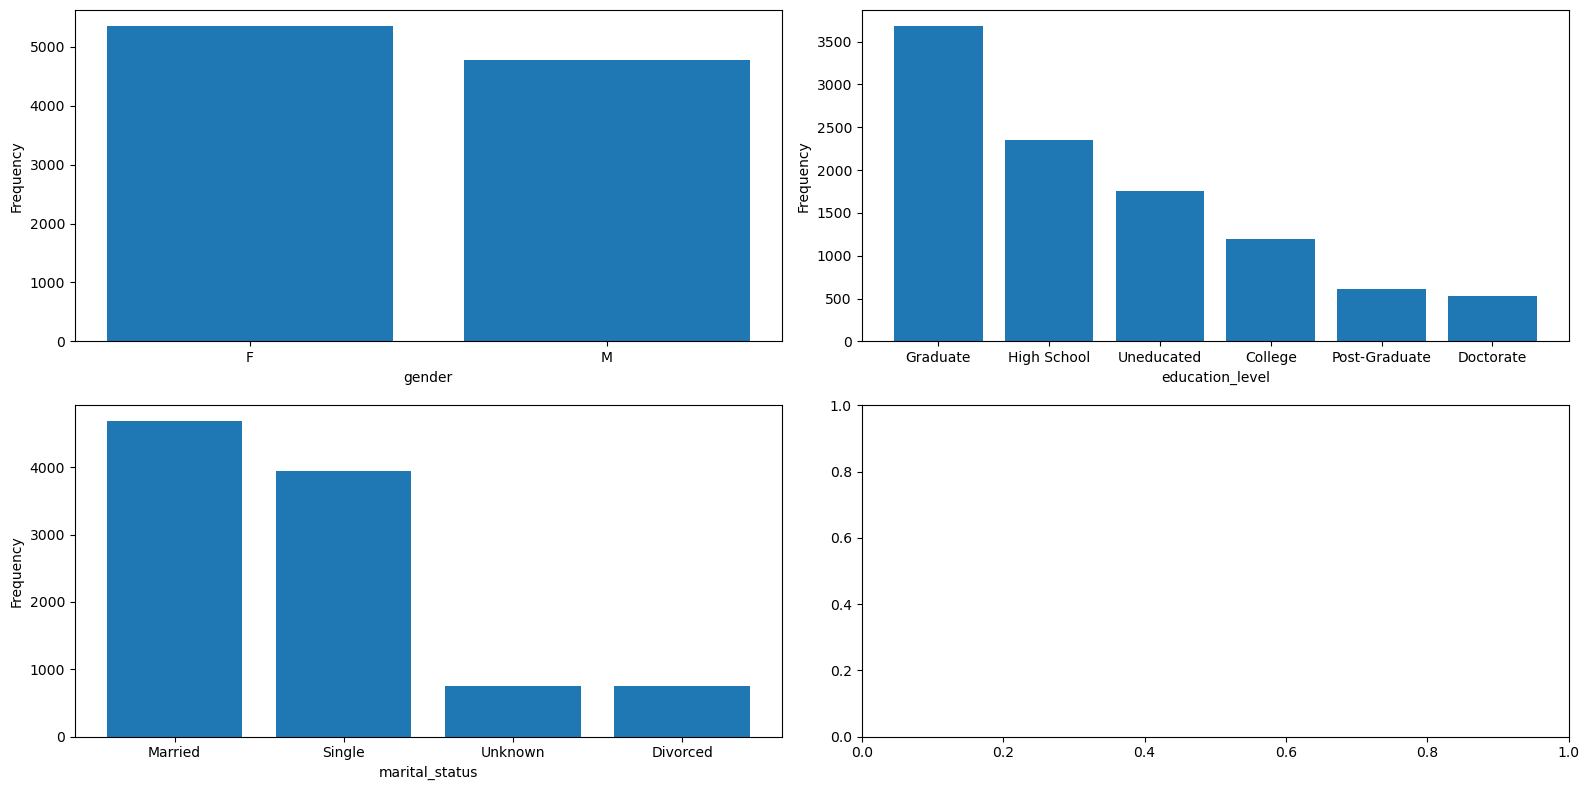

In [6]:
categorical_columns = ['gender', 'education_level', 'marital_status']


fig, ax = plt.subplots(2, 2, figsize=(16, 8))
for i, column in enumerate(categorical_columns):
    row_index = i // 2
    col_index = i % 2

    categorical_values = customers[column].value_counts()
    ax[row_index, col_index].bar(categorical_values.index, categorical_values.values)
    ax[row_index, col_index].set_xlabel(column)
    ax[row_index, col_index].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Some observations-

* Age and months_on_book column are normally distibuted.
* The 'estimated_income', 'credit_limit' and 'avg_utilization_ratio' columns are highly skewed to the right. This means most of our customers has low estimated income, low credit limit and low utilization ratio.
* the gender ratio of our dataset is almost equal.

After all we have explored in our dataset, these features seems to be the most relevant to be included in our clustering algorithm - 

* Age
* months_on_book
* Credit_limit
* estimated_income
* avg_utilization_ratio
* total_transaction_count
* total_transaction_amount
* education_level

# Feature Engineering

We have 3 categorical columns in our dataset. Since K-Means calculates the distance between the centroid and a given data-point, our categorical columns need to be in numerical formats.

For our education_level column, we can replace the strings with the following values-
* uneducated - 0
* high school - 1
* college - 2
* graduate - 3
* post-graduate - 4
* doctorate - 5

In [7]:
customers_modif = customers.copy()

In [8]:
customers_modif['education_level'].replace(to_replace={'Uneducated': 0, 'High School': 1, 'College': 2, 'Graduate': 3,
                                                       'Post-Graduate': 4, 'Doctorate': 5}, inplace=True)
print(customers_modif.head())

   customer_id  age gender  dependent_count  education_level marital_status  \
0    768805383   45      M                3                1        Married   
1    818770008   49      F                5                3         Single   
2    713982108   51      M                3                3        Married   
3    769911858   40      F                4                1        Unknown   
4    709106358   40      M                3                0        Married   

   estimated_income  months_on_book  total_relationship_count  \
0             69000              39                         5   
1             24000              44                         6   
2             93000              36                         4   
3             37000              34                         3   
4             65000              21                         5   

   months_inactive_12_mon  credit_limit  total_trans_amount  \
0                       1       12691.0                1144   
1       

We have our education_level column in numerical format. Now we need to scale our columns before applying the K-Means algorithm.

# Scaling the data

We will use skikit-learns's StandardScaler() for scaling the columns of our dataset. Standard scaler calculates the z-score of each distribution to scale the columns.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = customers_modif.drop(['customer_id', 'gender', 'dependent_count', 'marital_status', 'total_relationship_count',
                         'months_inactive_12_mon'], axis=1)
scaler.fit(X)
X_scaled = scaler.transform(X)
print(X_scaled.shape)

(10127, 8)


Now that our data is scaled, we need to determine the best number of clusters to use in our algorithm. To acheive this, we will calculate the inertia attained at different number of clusters and choose the cluster where inertia stops dropping at considerable levels. 

# Choosing k

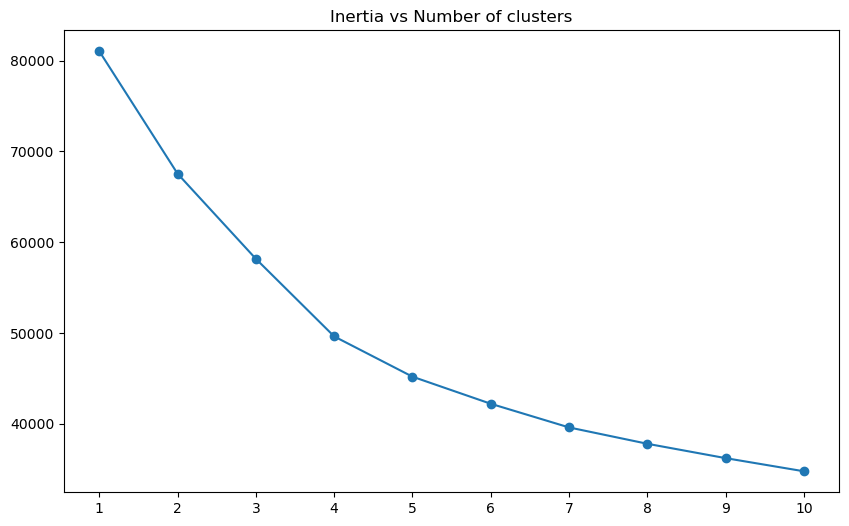

In [10]:
from sklearn.cluster import KMeans

inertias = []
for k in range(1, 11):
    model = KMeans(n_clusters=k)
    model.fit_predict(X_scaled)
    inertia = model.inertia_
    inertias.append(inertia)
    
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xticks(ticks=range(1, 11), labels=range(1, 11))
plt.title('Inertia vs Number of clusters')
plt.show()

We can ascertain that inertia decreases at a good speed till the 4th cluster, after which the speed of decrease slows down drastically. Hence, the suitable number of clusters to segment our customers should be 4.

In [11]:
model = KMeans(n_clusters=4)
clusters = model.fit_predict(X_scaled)

# Analyzing results

Now that we have obtained the clusters from the algorithm, it's time to assign those clusters to our customers in our original dataframe.

In [12]:
customers['Cluster'] = clusters + 1 #algorithm assigns cluster starting from number 0

In [13]:
print(customers.head())

   customer_id  age gender  dependent_count education_level marital_status  \
0    768805383   45      M                3     High School        Married   
1    818770008   49      F                5        Graduate         Single   
2    713982108   51      M                3        Graduate        Married   
3    769911858   40      F                4     High School        Unknown   
4    709106358   40      M                3      Uneducated        Married   

   estimated_income  months_on_book  total_relationship_count  \
0             69000              39                         5   
1             24000              44                         6   
2             93000              36                         4   
3             37000              34                         3   
4             65000              21                         5   

   months_inactive_12_mon  credit_limit  total_trans_amount  \
0                       1       12691.0                1144   
1             

Let's check the value counts of the cluster column to see how many customers got assigned to each cluster.

In [14]:
print(customers['Cluster'].value_counts())

3    3661
1    3596
2    1969
4     901
Name: Cluster, dtype: int64


Our 4th cluster got the least customers while our first 2 clusters got almost the same amount of clients.

Now we can visualize the characteristic of each cluster with reapect to each variable. Let's start with the numeric variables.

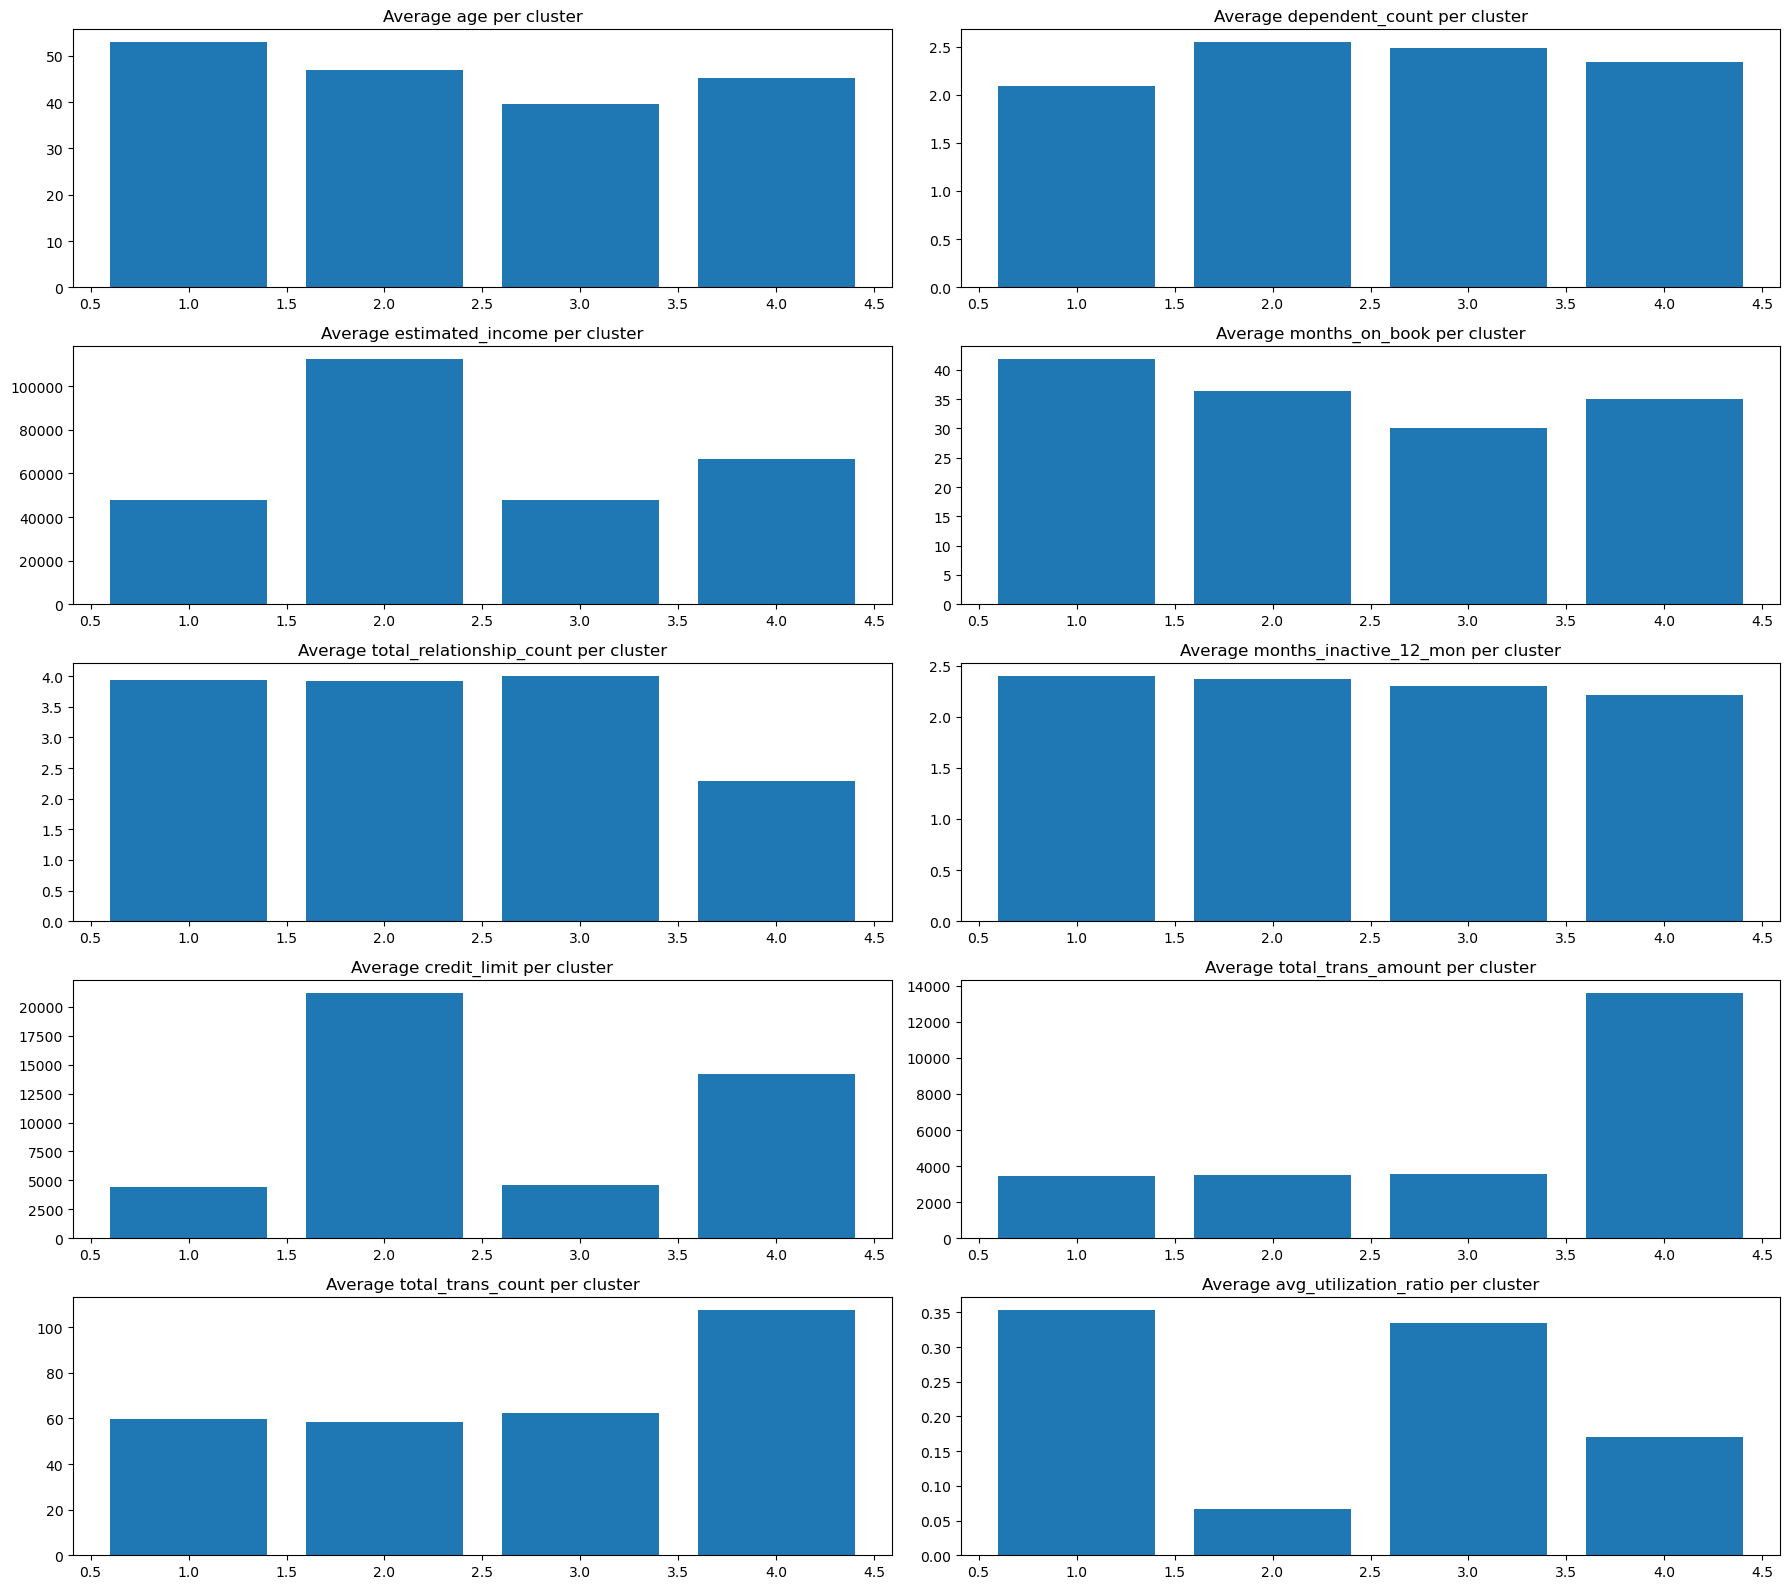

In [15]:
import numpy as np
import seaborn as sns

numeric_columns = customers.select_dtypes(include=np.number).drop(['customer_id', 'Cluster'], axis=1).columns

fig = plt.figure(figsize=(18, 16))
for i, column in enumerate(numeric_columns):
    df_plot = customers.groupby('Cluster')[column].mean()
    ax = fig.add_subplot(5, 2, i+1)
    ax.bar(df_plot.index, df_plot)
    ax.set_title(f'Average {column} per cluster')
    
plt.tight_layout()
plt.show()    

In [26]:
import warnings
warnings.filterwarnings("ignore")

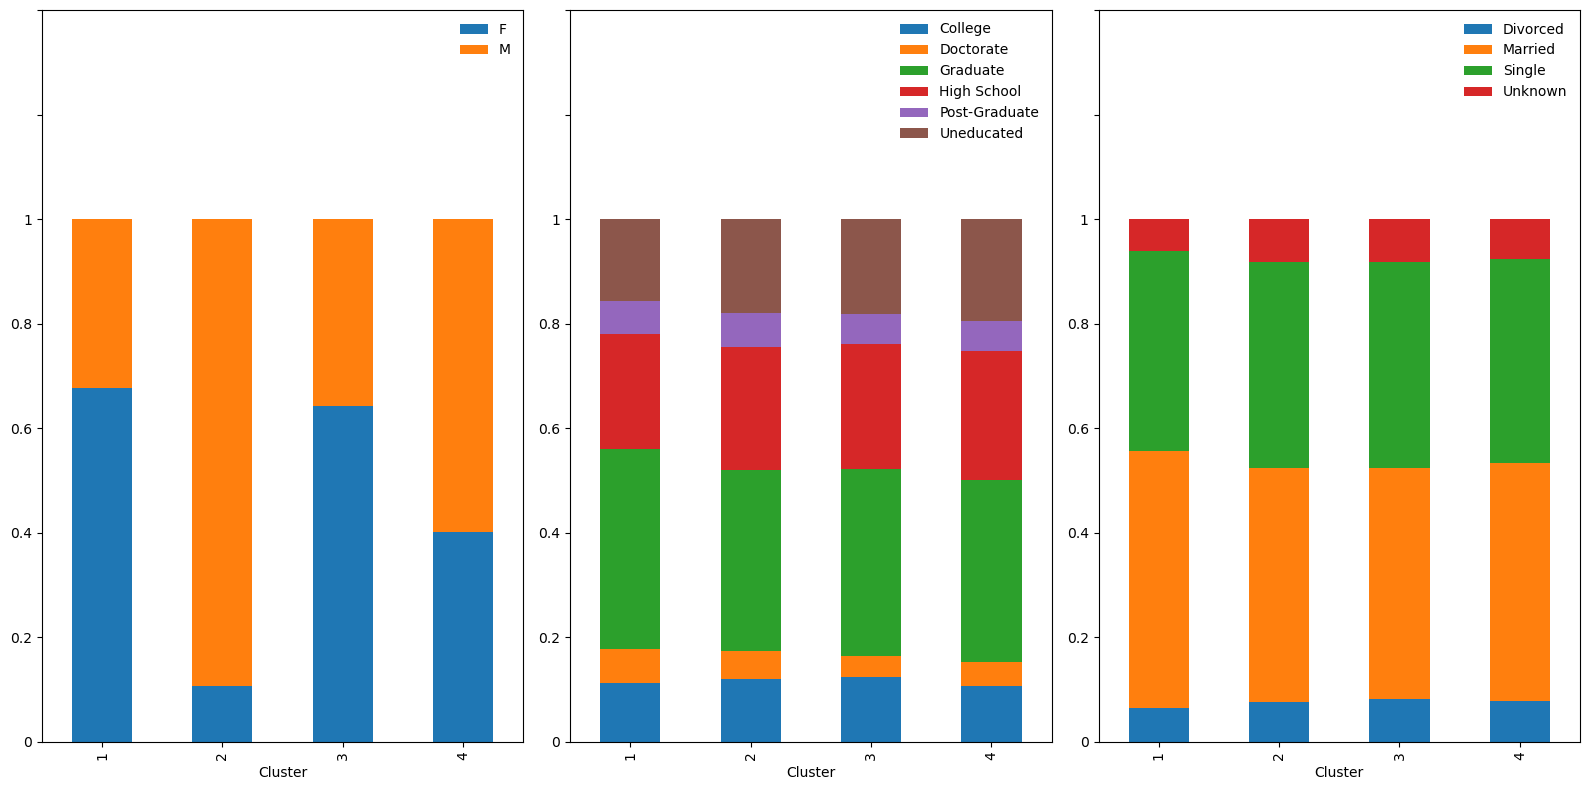

In [27]:
categorical_columns = ['gender', 'education_level', 'marital_status']

fig = plt.figure(figsize=(16, 8))
for idx, column in enumerate(categorical_columns):
    plot_df = pd.crosstab(index=customers['Cluster'], columns=customers[column], values=customers[column],
                         aggfunc='size', normalize='index')
    ax = fig.add_subplot(1, 3, idx+1)
    plot_df.plot.bar(stacked=True, ax=ax)
    
    ax.set_ylim(0, 1.4)
    ax.legend(frameon=False)
    ax.xaxis.grid(False)
    
    labels = [0, 0.2, 0.4, 0.6, 0.8, 1]
    ax.set_yticklabels(labels)
    
plt.tight_layout()
plt.show()

Some observations - 

* The mean age is uniform among each cluster.
* The 2nd cluster has the highest average estimated income among the clusters, followed by the 4th cluster.
* The 2nd cluster also has the customers with the highest credit limit again followed by the 4th cluster.
* The clients in 4th cluster had the highest average transaction amount.
* The 2nd cluster, which had the highest estimated income, has the lowest utilization ratio while the 1st and 3rd cluster had the highest utilization ratio.
* The majority of people in the second cluster are male while the majority of people in 1st and 3rd cluster are female.
* The education level among all clusters is approximately the same.
* The marital status among all clusters is nearly identical.

For those numerical variables with higher correlations we saw earlier, we can also use a scatter plot to visualize this correlation grouped by clusters and analyze how the clusters change between each area of the chart.

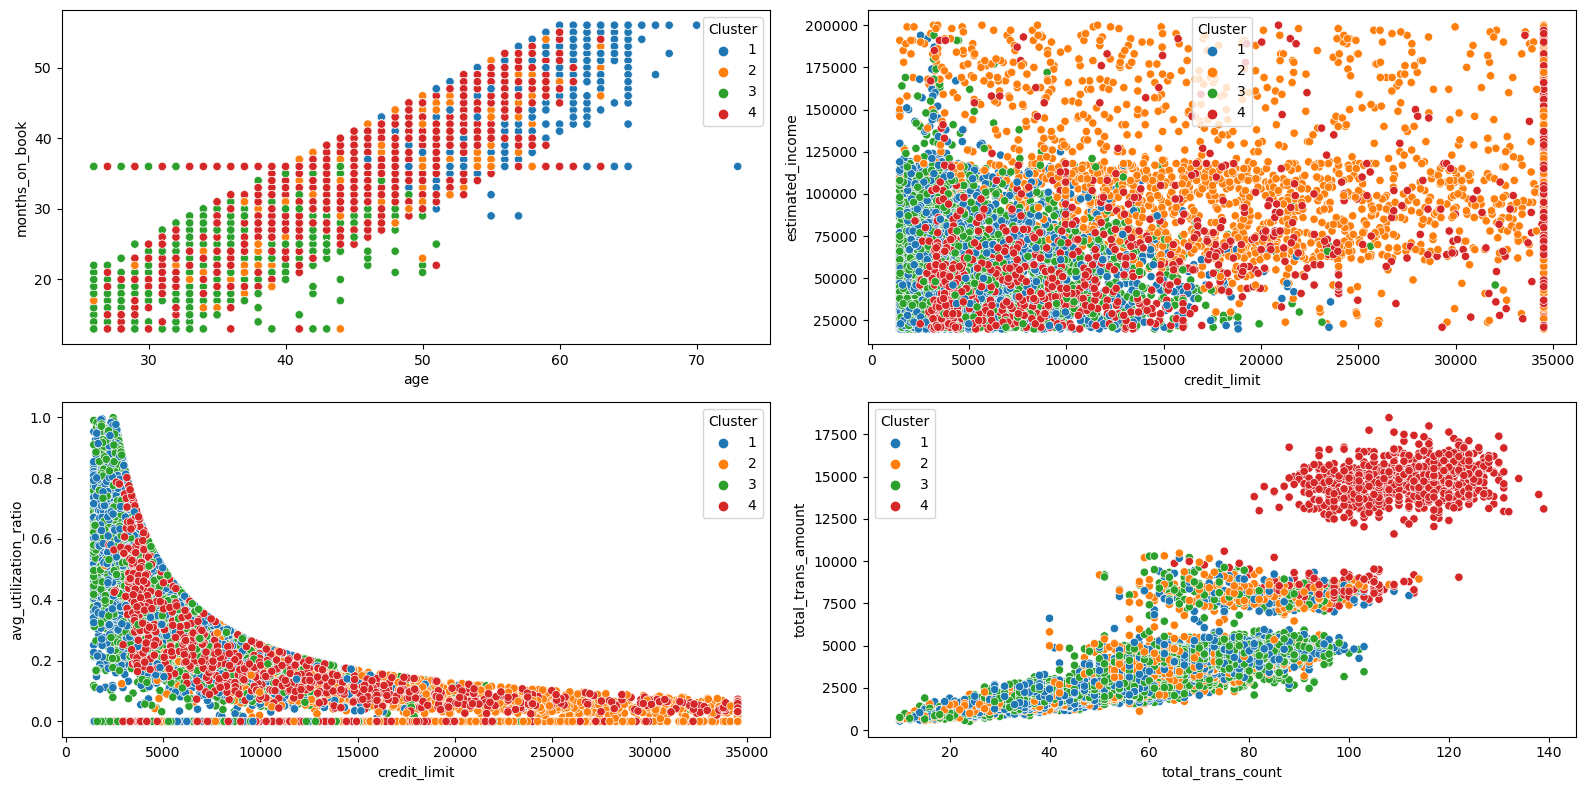

In [31]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 8))

sns.scatterplot(x='age', y='months_on_book', data=customers, hue='Cluster', palette='tab10', ax=ax1)
sns.scatterplot(x='credit_limit', y='estimated_income', data=customers, hue='Cluster', palette='tab10', ax=ax2)
sns.scatterplot(x='credit_limit', y='avg_utilization_ratio', data=customers, hue='Cluster', palette='tab10', ax=ax3)
sns.scatterplot(x='total_trans_count', y='total_trans_amount', data=customers, hue='Cluster', palette='tab10', ax=ax4)

plt.tight_layout()
plt.show()

# Conclusion

We have explored different properties of each cluster and visualized their relation with different features. We can now list the major characteristic of each cluster and the insights we can obtain from them.

## Cluster 1

**Characteristics-**  Majority female, low credit limit, low total transaction amount, high average utilization ratio.

**Insights-**  This cluster contains people who are significantly dependent on their credit cards for daily purchases but are given low credit limit(due to low estimated income). Increasing their credit limit might be a risky undertaking. 

## Cluster 2

**Characteristics-** Majority male, high estimated income, high credit limit, low total transaction amount and low utilization ratio.

**Insights-** This group is already given a high credit limit but that is not sufficiently utilized. This group is low risk and can be offered some deals to increase their utilization ratio.

## Cluster 3

**Characteristics-** Majority female, low credit limit, low total transaction amount, high average utilization ratio.

**Insights-** This group highly resembles the first cluster albeit less risky due to slightly higher estimated income and marginally lower utilization ratio.

## Cluster 4

**Characteristics-** Small cluster, equal gender proportion, slightly higher income, moderate credit limit, high transaction amount, moderate utilization ratio.

**Insights-** This group uses the card the most on average but still haven't reached their peak utilization. Can be offered more incentives to make bigger purchases.